## 1 günlük petrol

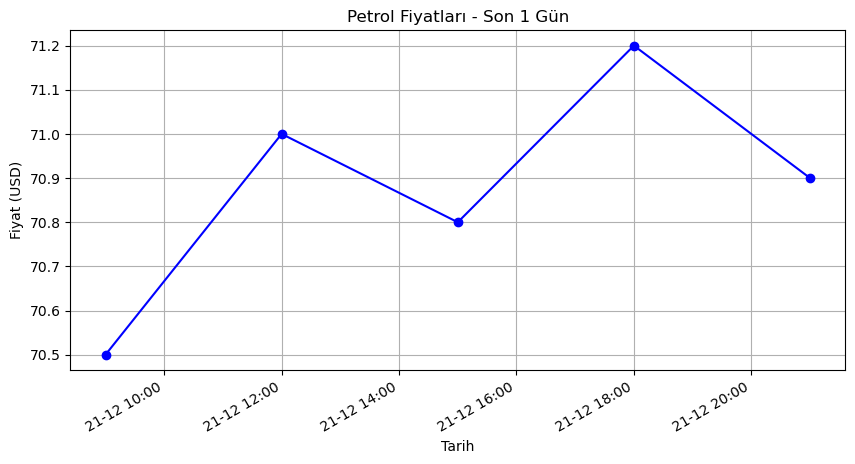

In [2]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

# Örnek tarih ve fiyat verileri
tarihler = ['2024-12-21 09:00', '2024-12-21 12:00', '2024-12-21 15:00', '2024-12-21 18:00', '2024-12-21 21:00']
fiyatlar = [70.5, 71.0, 70.8, 71.2, 70.9]

# Tarihleri datetime formatına dönüştür
tarihler = [datetime.strptime(tarih, '%Y-%m-%d %H:%M') for tarih in tarihler]

# Grafik oluşturma
plt.figure(figsize=(10, 5))
plt.plot(tarihler, fiyatlar, marker='o', linestyle='-', color='b')
plt.gcf().autofmt_xdate()
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m %H:%M'))
plt.title('Petrol Fiyatları - Son 1 Gün')
plt.xlabel('Tarih')
plt.ylabel('Fiyat (USD)')
plt.grid(True)
plt.show()

In [2]:
import json
from datetime import datetime

# Örnek tarih ve fiyat verileri
tarihler = ['2024-12-21 09:00', '2024-12-21 12:00', '2024-12-21 15:00', '2024-12-21 18:00', '2024-12-21 21:00']
fiyatlar = [70.5, 71.0, 70.8, 71.2, 70.9]

# Verileri JSON formatına dönüştürmek için bir sözlük oluştur
veri = {
    "petrol_fiyatlari": [
        {"tarih": tarih, "fiyat": fiyat} for tarih, fiyat in zip(tarihler, fiyatlar)
    ]
}

# JSON dosyasını masaüstüne kaydet
dosya_yolu = "/Users/koray/Desktop/grafikler/1daysoil.json"
with open(dosya_yolu, "w", encoding="utf-8") as dosya:
    json.dump(veri, dosya, ensure_ascii=False, indent=4)

print(f"Veriler başarıyla {dosya_yolu} yoluna kaydedildi.")

Veriler başarıyla /Users/koray/Desktop/grafikler/1daysgold.json yoluna kaydedildi.


### 1 haftalık petrol

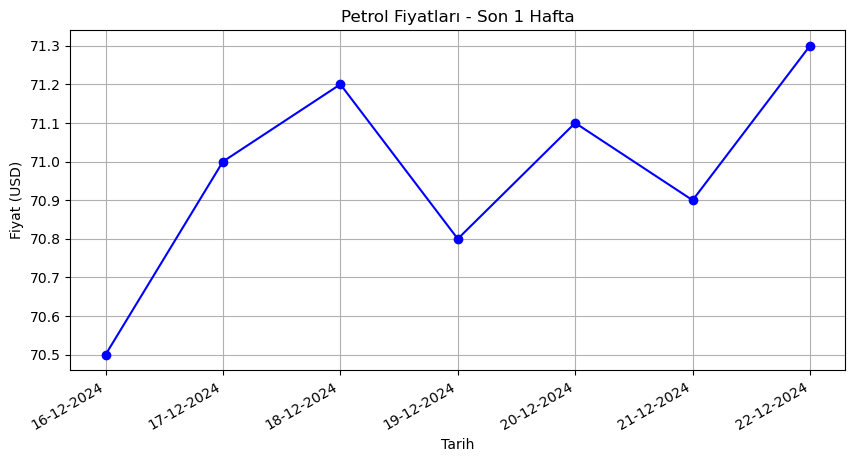

In [10]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime, timedelta

# Örnek tarih ve fiyat verileri
tarihler = [(datetime.now() - timedelta(days=i)).strftime('%Y-%m-%d') for i in range(6, -1, -1)]
fiyatlar = [70.5, 71.0, 71.2, 70.8, 71.1, 70.9, 71.3]

# Tarihleri datetime formatına dönüştür
tarihler = [datetime.strptime(tarih, '%Y-%m-%d') for tarih in tarihler]

# Grafik oluşturma
plt.figure(figsize=(10, 5))
plt.plot(tarihler, fiyatlar, marker='o', linestyle='-', color='b')
plt.gcf().autofmt_xdate()
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
plt.title('Petrol Fiyatları - Son 1 Hafta')
plt.xlabel('Tarih')
plt.ylabel('Fiyat (USD)')
plt.grid(True)
plt.show()

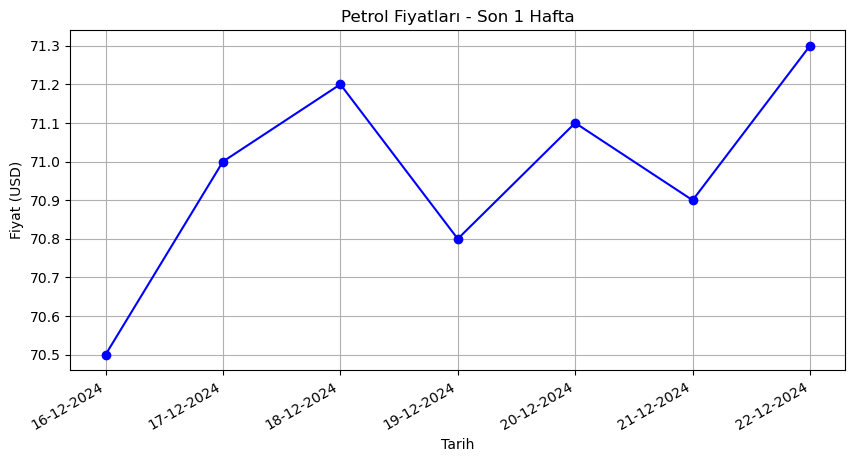

Veriler başarıyla /Users/koray/Desktop/grafikler/1weekoil.json yoluna kaydedildi.


In [12]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime, timedelta
import json
import os

# Örnek tarih ve fiyat verileri
tarihler = [(datetime.now() - timedelta(days=i)).strftime('%Y-%m-%d') for i in range(6, -1, -1)]
fiyatlar = [70.5, 71.0, 71.2, 70.8, 71.1, 70.9, 71.3]

# Tarihleri datetime formatına dönüştür
tarihler_datetime = [datetime.strptime(tarih, '%Y-%m-%d') for tarih in tarihler]

# Grafik oluşturma
plt.figure(figsize=(10, 5))
plt.plot(tarihler_datetime, fiyatlar, marker='o', linestyle='-', color='b')
plt.gcf().autofmt_xdate()
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
plt.title('Petrol Fiyatları - Son 1 Hafta')
plt.xlabel('Tarih')
plt.ylabel('Fiyat (USD)')
plt.grid(True)
plt.show()

# JSON formatında veriyi hazırlama
veri = {
    "petrol_fiyatlari": [
        {"tarih": tarih, "fiyat": fiyat} for tarih, fiyat in zip(tarihler, fiyatlar)
    ]
}

# Dosya yolunu belirleme
klasor_yolu = "/Users/koray/Desktop/grafikler"
dosya_yolu = os.path.join(klasor_yolu, "1weekoil.json")

# Klasör yoksa oluştur
os.makedirs(klasor_yolu, exist_ok=True)

# JSON dosyasını kaydet
with open(dosya_yolu, "w", encoding="utf-8") as dosya:
    json.dump(veri, dosya, ensure_ascii=False, indent=4)

print(f"Veriler başarıyla {dosya_yolu} yoluna kaydedildi.")

### 1 aylık petrol

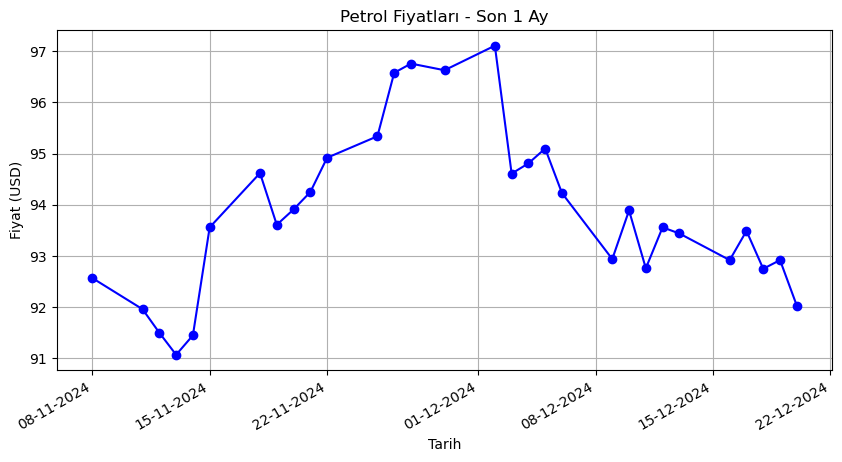

In [17]:
import requests
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

# API anahtarı ve URL
api_key = "ZRBHQKIYIETVGULJ"
symbol = "CL"  # Ham petrol sembolü
function = "TIME_SERIES_DAILY"
url = f"https://www.alphavantage.co/query?function={function}&symbol={symbol}&apikey={api_key}"

# API'den veriyi çek
response = requests.get(url)
data = response.json()

# Verileri işleme
if "Time Series (Daily)" in data:
    time_series = data["Time Series (Daily)"]
    tarihler = []
    fiyatlar = []

    # Son 30 günün verilerini al
    for tarih, degerler in list(time_series.items())[:30]:
        tarihler.append(datetime.strptime(tarih, '%Y-%m-%d'))
        fiyatlar.append(float(degerler["4. close"]))

    # Grafiği çiz
    plt.figure(figsize=(10, 5))
    plt.plot(tarihler, fiyatlar, marker='o', linestyle='-', color='b')
    plt.gcf().autofmt_xdate()
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
    plt.title('Petrol Fiyatları - Son 1 Ay')
    plt.xlabel('Tarih')
    plt.ylabel('Fiyat (USD)')
    plt.grid(True)
    plt.show()
else:
    print("API'den veri çekilirken bir sorun oluştu:", data.get("Error Message", "Bilinmeyen hata"))

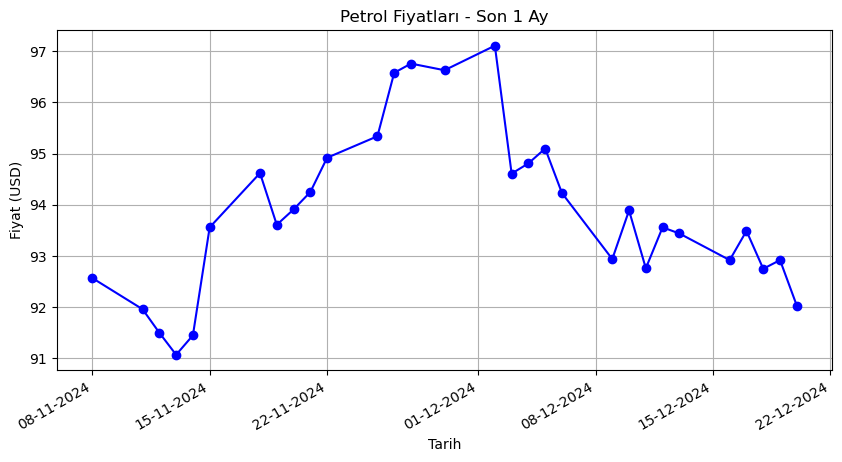

Veriler başarıyla /Users/koray/Desktop/grafikler/1monthoil.json yoluna kaydedildi.


In [19]:
import requests
import json
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime
import os

# API anahtarı ve URL
api_key = "ZRBHQKIYIETVGULJ"
symbol = "CL"  # Ham petrol sembolü
function = "TIME_SERIES_DAILY"
url = f"https://www.alphavantage.co/query?function={function}&symbol={symbol}&apikey={api_key}"

# API'den veriyi çek
response = requests.get(url)
data = response.json()

# Verileri işleme
if "Time Series (Daily)" in data:
    time_series = data["Time Series (Daily)"]
    tarihler = []
    fiyatlar = []

    # Son 30 günün verilerini al
    for tarih, degerler in list(time_series.items())[:30]:
        tarihler.append(datetime.strptime(tarih, '%Y-%m-%d'))
        fiyatlar.append(float(degerler["4. close"]))

    # Grafiği çiz
    plt.figure(figsize=(10, 5))
    plt.plot(tarihler, fiyatlar, marker='o', linestyle='-', color='b')
    plt.gcf().autofmt_xdate()
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
    plt.title('Petrol Fiyatları - Son 1 Ay')
    plt.xlabel('Tarih')
    plt.ylabel('Fiyat (USD)')
    plt.grid(True)
    plt.show()

    # JSON formatında veriyi hazırlama
    veri = {
        "petrol_fiyatlari": [
            {"tarih": tarih.strftime('%Y-%m-%d'), "fiyat": fiyat}
            for tarih, fiyat in zip(tarihler, fiyatlar)
        ]
    }

    # Dosya yolunu belirleme
    klasor_yolu = "/Users/koray/Desktop/grafikler"
    dosya_yolu = os.path.join(klasor_yolu, "1monthoil.json")

    # Klasör yoksa oluştur
    os.makedirs(klasor_yolu, exist_ok=True)

    # JSON dosyasını kaydet
    with open(dosya_yolu, "w", encoding="utf-8") as dosya:
        json.dump(veri, dosya, ensure_ascii=False, indent=4)

    print(f"Veriler başarıyla {dosya_yolu} yoluna kaydedildi.")
else:
    print("API'den veri çekilirken bir sorun oluştu:", data.get("Error Message", "Bilinmeyen hata"))

### 1 yıllık petrol 

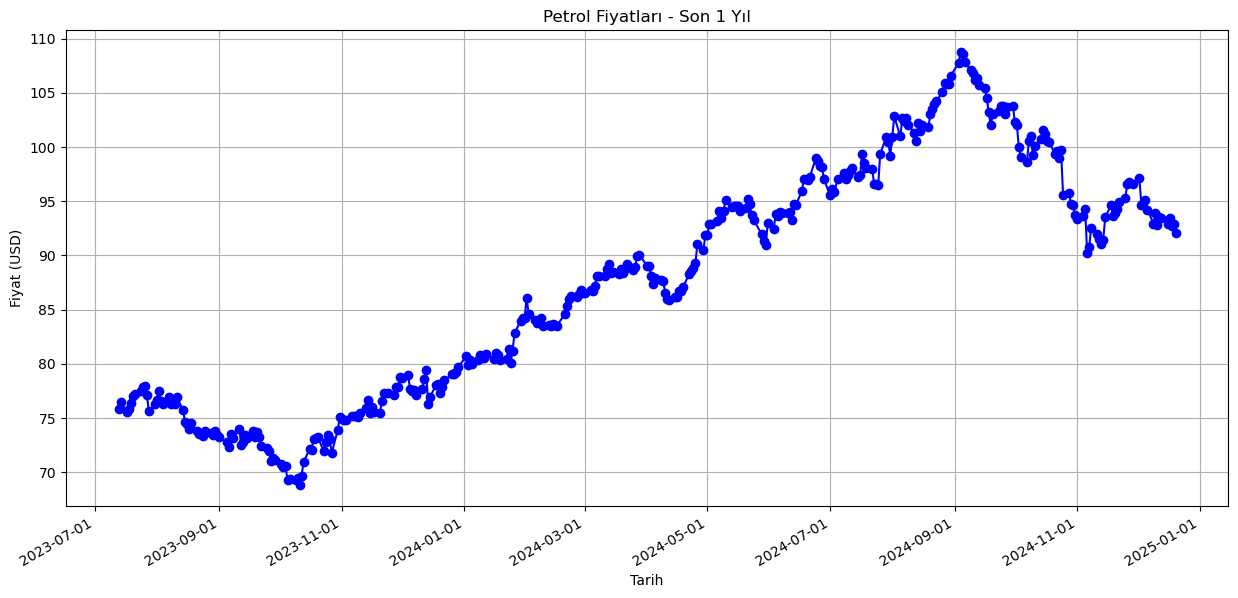

In [24]:
import requests
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

# API anahtarı ve URL
api_key = "ZRBHQKIYIETVGULJ"
symbol = "CL"  # Ham petrol sembolü
function = "TIME_SERIES_DAILY"
url = f"https://www.alphavantage.co/query?function={function}&symbol={symbol}&apikey={api_key}&outputsize=full"

# API'den veriyi çek
response = requests.get(url)
data = response.json()

# Verileri işleme
if "Time Series (Daily)" in data:
    time_series = data["Time Series (Daily)"]
    tarihler = []
    fiyatlar = []

    # Son 365 günün verilerini al
    for tarih, degerler in list(time_series.items())[:365]:
        tarihler.append(datetime.strptime(tarih, '%Y-%m-%d'))
        fiyatlar.append(float(degerler["4. close"]))

    # Grafiği çiz
    plt.figure(figsize=(15, 7))
    plt.plot(tarihler, fiyatlar, marker='o', linestyle='-', color='b')
    plt.gcf().autofmt_xdate()
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.title('Petrol Fiyatları - Son 1 Yıl')
    plt.xlabel('Tarih')
    plt.ylabel('Fiyat (USD)')
    plt.grid(True)
    plt.show()
else:
    print("API'den veri çekilirken bir sorun oluştu:", data.get("Error Message", "Bilinmeyen hata"))

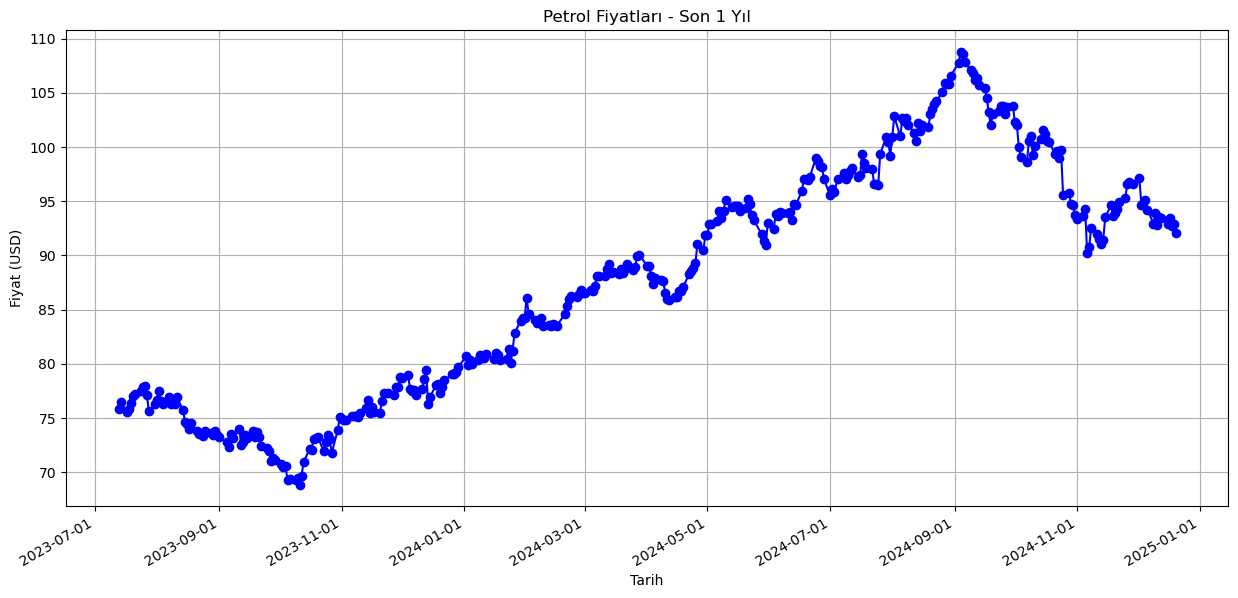

Veriler başarıyla /Users/koray/Desktop/grafikler/oil/1yearoil.json yoluna kaydedildi.


In [26]:
import requests
import json
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime
import os

# API anahtarı ve URL
api_key = "ZRBHQKIYIETVGULJ"
symbol = "CL"  # Ham petrol sembolü
function = "TIME_SERIES_DAILY"
url = f"https://www.alphavantage.co/query?function={function}&symbol={symbol}&apikey={api_key}&outputsize=full"

# API'den veriyi çek
response = requests.get(url)
data = response.json()

# Verileri işleme
if "Time Series (Daily)" in data:
    time_series = data["Time Series (Daily)"]
    tarihler = []
    fiyatlar = []

    # Son 365 günün verilerini al
    for tarih, degerler in list(time_series.items())[:365]:
        tarihler.append(datetime.strptime(tarih, '%Y-%m-%d'))
        fiyatlar.append(float(degerler["4. close"]))

    # Grafiği çiz
    plt.figure(figsize=(15, 7))
    plt.plot(tarihler, fiyatlar, marker='o', linestyle='-', color='b')
    plt.gcf().autofmt_xdate()
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.title('Petrol Fiyatları - Son 1 Yıl')
    plt.xlabel('Tarih')
    plt.ylabel('Fiyat (USD)')
    plt.grid(True)
    plt.show()

    # JSON formatında veriyi hazırlama
    veri = {
        "petrol_fiyatlari": [
            {"tarih": tarih.strftime('%Y-%m-%d'), "fiyat": fiyat}
            for tarih, fiyat in zip(tarihler, fiyatlar)
        ]
    }

    # Dosya yolunu belirleme
    klasor_yolu = "/Users/koray/Desktop/grafikler/oil"
    dosya_yolu = os.path.join(klasor_yolu, "1yearoil.json")

    # Klasör yoksa oluştur
    os.makedirs(klasor_yolu, exist_ok=True)

    # JSON dosyasını kaydet
    with open(dosya_yolu, "w", encoding="utf-8") as dosya:
        json.dump(veri, dosya, ensure_ascii=False, indent=4)

    print(f"Veriler başarıyla {dosya_yolu} yoluna kaydedildi.")
else:
    print("API'den veri çekilirken bir sorun oluştu:", data.get("Error Message", "Bilinmeyen hata"))

### 5 yıllık petrol

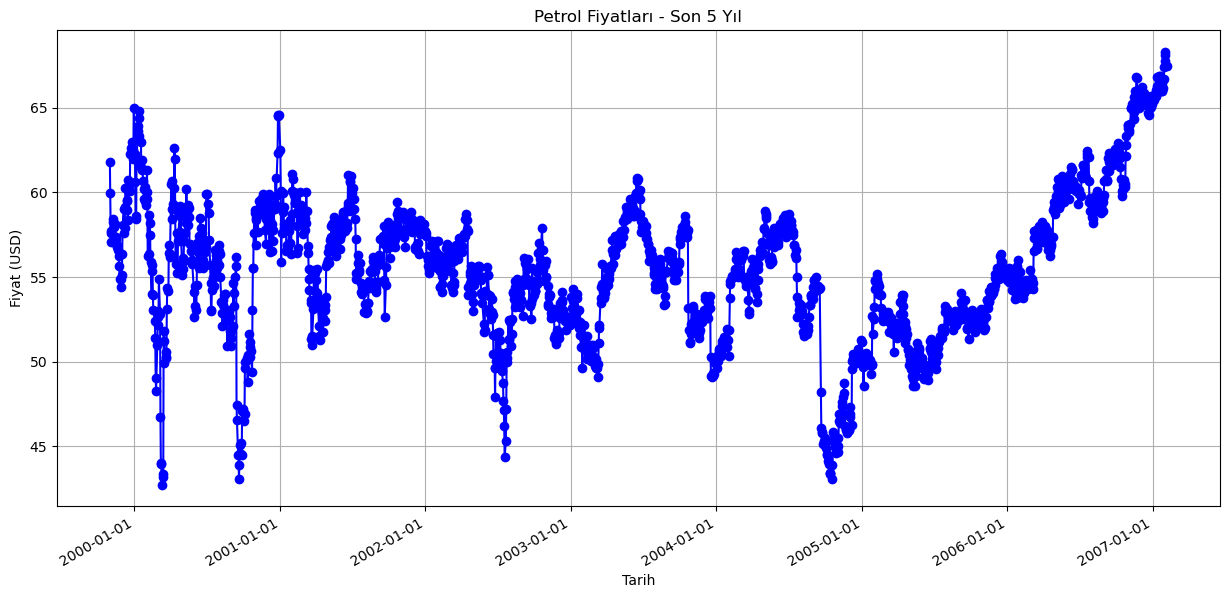

In [29]:
import requests
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

# API anahtarı ve URL
api_key = "ZRBHQKIYIETVGULJ"
symbol = "CL"  # Ham petrol sembolü
function = "TIME_SERIES_DAILY"
url = f"https://www.alphavantage.co/query?function={function}&symbol={symbol}&apikey={api_key}&outputsize=full"

# API'den veriyi çek
response = requests.get(url)
data = response.json()

# Verileri işleme
if "Time Series (Daily)" in data:
    time_series = data["Time Series (Daily)"]
    tarihler = []
    fiyatlar = []

    # Verileri ters sırayla al (eski tarihten yeniye doğru)
    for tarih, degerler in sorted(time_series.items())[:5 * 365]:
        tarihler.append(datetime.strptime(tarih, '%Y-%m-%d'))
        fiyatlar.append(float(degerler["4. close"]))

    # Grafiği çiz
    plt.figure(figsize=(15, 7))
    plt.plot(tarihler, fiyatlar, marker='o', linestyle='-', color='b')
    plt.gcf().autofmt_xdate()
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.title('Petrol Fiyatları - Son 5 Yıl')
    plt.xlabel('Tarih')
    plt.ylabel('Fiyat (USD)')
    plt.grid(True)
    plt.show()
else:
    print("API'den veri çekilirken bir sorun oluştu:", data.get("Error Message", "Bilinmeyen hata"))

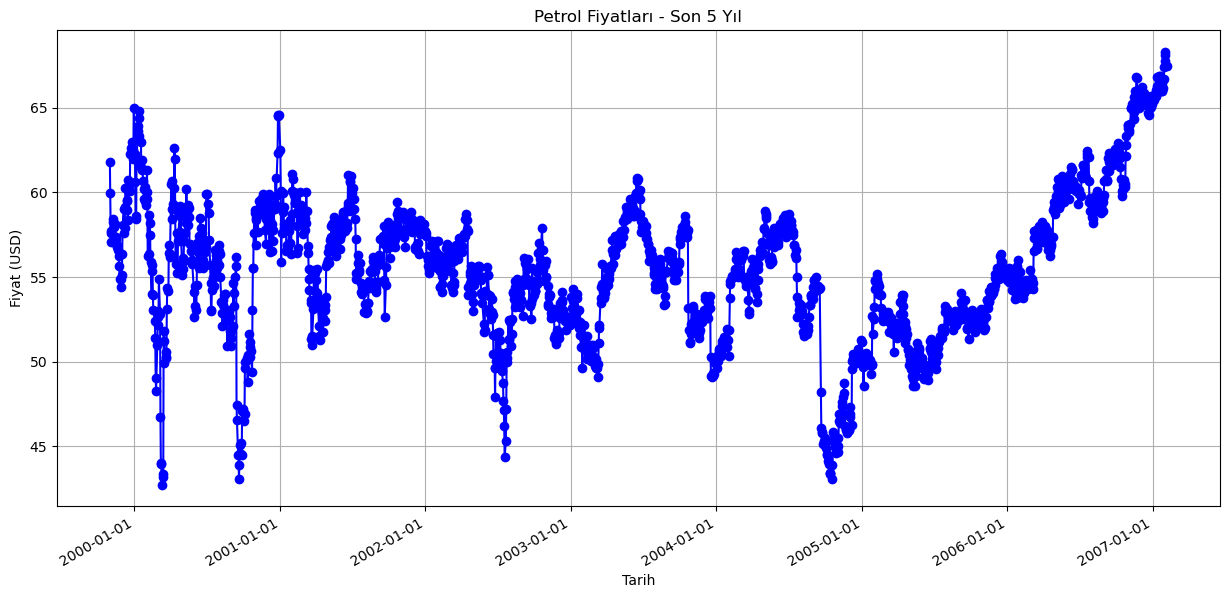

Veriler başarıyla /Users/koray/Desktop/grafikler/oil/5yearoil.json yoluna kaydedildi.


In [33]:
import requests
import json
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime
import os

# API anahtarı ve URL
api_key = "ZRBHQKIYIETVGULJ"
symbol = "CL"  # Ham petrol sembolü
function = "TIME_SERIES_DAILY"
url = f"https://www.alphavantage.co/query?function={function}&symbol={symbol}&apikey={api_key}&outputsize=full"

# API'den veriyi çek
response = requests.get(url)
data = response.json()

# Verileri işleme
if "Time Series (Daily)" in data:
    time_series = data["Time Series (Daily)"]
    tarihler = []
    fiyatlar = []

    # Verileri ters sırayla al (eski tarihten yeniye doğru) ve 5 yıl verisi
    for tarih, degerler in sorted(time_series.items())[:5 * 365]:
        tarihler.append(datetime.strptime(tarih, '%Y-%m-%d'))
        fiyatlar.append(float(degerler["4. close"]))

    # Grafiği çiz
    plt.figure(figsize=(15, 7))
    plt.plot(tarihler, fiyatlar, marker='o', linestyle='-', color='b')
    plt.gcf().autofmt_xdate()
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.title('Petrol Fiyatları - Son 5 Yıl')
    plt.xlabel('Tarih')
    plt.ylabel('Fiyat (USD)')
    plt.grid(True)
    plt.show()

    # JSON formatında veriyi hazırlama
    veri = {
        "petrol_fiyatlari": [
            {"tarih": tarih.strftime('%Y-%m-%d'), "fiyat": fiyat}
            for tarih, fiyat in zip(tarihler, fiyatlar)
        ]
    }

    # Dosya yolunu belirleme
    klasor_yolu = "/Users/koray/Desktop/grafikler/oil"
    dosya_yolu = os.path.join(klasor_yolu, "5yearoil.json")

    # Klasör yoksa oluştur
    os.makedirs(klasor_yolu, exist_ok=True)

    # JSON dosyasını kaydet
    with open(dosya_yolu, "w", encoding="utf-8") as dosya:
        json.dump(veri, dosya, ensure_ascii=False, indent=4)

    print(f"Veriler başarıyla {dosya_yolu} yoluna kaydedildi.")
else:
    print("API'den veri çekilirken bir sorun oluştu:", data.get("Error Message", "Bilinmeyen hata"))